### 词汇总数18309487---1800万
### 文件大小 133MB
### 字典词汇 20000词

#### 1.设置断点保存
#### 2.生成全部词汇图片
#### 3.根据论文Distributed Representations ofWords and Phrases and their Compositionality调整负样本数量

## 现在是基于tensorflow框架的


In [1]:

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
import zipfile

import numpy as np
import time
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin

In [2]:

filename = "../word2vectorProject/w2vMaster/135MB.txt"


def read_data(filename):
    with open(filename, encoding='utf-8') as f:
        data = []
        counter = 0
        for line in f:
            line = line.strip('\n').strip('')
            if line != "":
                counter += 1
                data_tmp = [word for word in line.split(" ") if word != '']
            data.extend(data_tmp)
            #print(data_tmp)
        print(counter)
    return data


In [3]:
words = read_data(filename)
print('Data size', len(words))

94198
Data size 18309487


In [4]:
# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 20000


# 建立数据字典
def build_dataset(words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reverse_dictionary


data, count, dictionary, reverse_dictionary = build_dataset(words)

中国
162429
生变
76


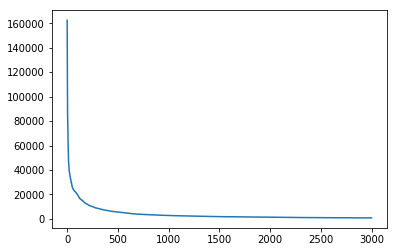

In [85]:
print(count[1:][0][0])
print(count[1:][0][1])
print(count[1:][20000-2][0])
print(count[1:][20000-2][1])
count_list = []
count_con = []
for i in xrange(3000):
    count_list.append(count[1:][i][1])
    count_con.append(count[1:][i][0])
#print(type(count[1:][3]))
import matplotlib.pyplot as plt
plt.plot(xrange(3000),count_list)
plt.show()

In [91]:
print(count) #字频统计

[['UNK', 2064173], ('中国', 162429), ('发展', 123292), ('人', 121316), ('公司', 99063), ('工作', 86419), ('市场', 82930), ('企业', 81309), ('记者', 73845), ('问题', 66561), ('建设', 64095), ('经济', 57595), ('国家', 56162), ('投资', 51817), ('服务', 51475), ('项目', 46392), ('情况', 44989), ('美国', 44689), ('时间', 44350), ('产品', 40329), ('方面', 39846), ('技术', 39041), ('城市', 38684), ('行业', 38312), ('数据', 38153), ('北京', 37621), ('信息', 36904), ('管理', 36526), ('网', 35393), ('党', 34928), ('社会', 34461), ('平台', 34281), ('文化', 34022), ('合作', 32882), ('基金', 32817), ('活动', 32536), ('改革', 32104), ('政策', 32051), ('国际', 31919), ('全国', 30868), ('影响', 30376), ('世界', 29548), ('方式', 29427), ('也是', 29395), ('产业', 29391), ('价格', 29059), ('资金', 28754), ('生活', 27161), ('中心', 27078), ('报告', 27051), ('全球', 26049), ('业务', 25986), ('教育', 25920), ('旅游', 25686), ('时代', 25655), ('内容', 25495), ('能力', 25405), ('领域', 25177), ('政府', 24975), ('研究', 24808), ('互联网', 24409), ('有限公司', 24396), ('我国', 24098), ('机构', 23815), ('风险', 23722), ('习近平', 23702), ('

In [92]:
print(reverse_dictionary) #建立的字典

{0: 'UNK', 1: '中国', 2: '发展', 3: '人', 4: '公司', 5: '工作', 6: '市场', 7: '企业', 8: '记者', 9: '问题', 10: '建设', 11: '经济', 12: '国家', 13: '投资', 14: '服务', 15: '项目', 16: '情况', 17: '美国', 18: '时间', 19: '产品', 20: '方面', 21: '技术', 22: '城市', 23: '行业', 24: '数据', 25: '北京', 26: '信息', 27: '管理', 28: '网', 29: '党', 30: '社会', 31: '平台', 32: '文化', 33: '合作', 34: '基金', 35: '活动', 36: '改革', 37: '政策', 38: '国际', 39: '全国', 40: '影响', 41: '世界', 42: '方式', 43: '也是', 44: '产业', 45: '价格', 46: '资金', 47: '生活', 48: '中心', 49: '报告', 50: '全球', 51: '业务', 52: '教育', 53: '旅游', 54: '时代', 55: '内容', 56: '能力', 57: '领域', 58: '政府', 59: '研究', 60: '互联网', 61: '有限公司', 62: '我国', 63: '机构', 64: '风险', 65: '习近平', 66: '市', 67: '人民', 68: '特色', 69: '孩子', 70: '精神', 71: '生产', 72: '科技', 73: '部门', 74: '网络', 75: '规定', 76: '重点', 77: '金融', 78: '集团', 79: '上海', 80: '计划', 81: '部分', 82: '媒体', 83: '代表', 84: '用户', 85: '月', 86: '人员', 87: '系统', 88: '需求', 89: '银行', 90: '地区', 91: '会议', 92: '比赛', 93: '目标', 94: '环境', 95: '社会主义', 96: '品牌', 97: '制度', 98: '历史', 99: '有关', 100: '战

In [94]:
import numpy as np

result=np.load("vecorForTxt.npy")
print(result[:100])

[[ 0.10834189  0.05911773  0.04224008 ...,  0.11548038  0.08163714
  -0.02516447]
 [ 0.08022337 -0.07454718 -0.0060557  ...,  0.04838875  0.01521334
  -0.08843096]
 [-0.06634118 -0.00299353 -0.00862136 ...,  0.06627709  0.04315944
  -0.15932006]
 ..., 
 [ 0.20242271 -0.06170232  0.03953151 ...,  0.08369786  0.10925319
   0.00229248]
 [ 0.09697078 -0.11253389 -0.03707589 ...,  0.07406789  0.14265558
  -0.10084301]
 [ 0.04770819 -0.21931735  0.05508634 ...,  0.08182482 -0.0785157
   0.02797863]]


##Average loss at step  400000 :  2.4924735736846926
##词语训练位置: 7290581
##当前学习率： 0.92274475
##保存变量模型save/SaveModel: save/SaveModel.ckpt-400001

Nearest to 文化:   艺术 ,   特色 ,   文艺 ,   中华 ,   内涵 ,   亮色 ,   美食 ,   齐聚 ,

Nearest to 研究:   研发 ,   分析 ,   科学 ,   瑞银 ,   专家 ,   检测 ,   报告 ,   问卷 ,

Nearest to 生产:   加工 ,   设备 ,   质量 ,   产能 ,   食品 ,   流通 ,   厂家 ,   运输 ,

Nearest to 会议:   大会 ,   报告 ,   通知 ,   座谈会 ,   讲话 ,   全国代表大会 ,   办公室 ,   委员 ,

Nearest to 基金:   策略 ,   回报 ,   收益 ,   财险 ,   债券 ,   产品 ,   收益率 ,   财富 ,

Nearest to 精神:   笑气 ,   全会 ,   背景 ,   贯彻落实 ,   沉船 ,   单程 ,   思想 ,   发扬民主 ,

Nearest to 媒体:   消息 ,   调查 ,   网友 ,   信息 ,   新闻媒体 ,   电视台 ,   疑似 ,   观点 ,

Nearest to 问题:   现象 ,   难题 ,   情况 ,   措施 ,   态度 ,   原因 ,   方面 ,   状况 ,

Nearest to 信息:   资源 ,   内容 ,   云上 ,   媒体 ,   服务质量 ,   行为 ,   信息系统 ,   数据 ,

Nearest to 数据:   统计数据 ,   月份 ,   分析 ,   报告 ,   消息 ,   调查 ,   基本面 ,   纽约时报 ,

Nearest to 方面:   也是 ,   水平 ,   程度 ,   基础 ,   整体 ,   动力 ,   领域 ,   态度 ,

Nearest to 北京:   深圳 ,   南京 ,   中财网 ,   北京市 ,   广州 ,   上海 ,   杭州 ,   中山 ,

Nearest to 产品:   商品 ,   品牌 ,   客户 ,   品质 ,   消费者 ,   品种 ,   技术培训 ,   产品质量 ,

Nearest to 环境:   影响 ,   状况 ,   程度 ,   现象 ,   手段 ,   状态 ,   情绪 ,   行为 ,

Nearest to 改革:   国企改革 ,   转型 ,   体制 ,   监管 ,   突破 ,   阿坝州 ,   重组 ,   常态 ,

Nearest to 有关:   通知 ,   负责人 ,   中央 ,   地方 ,   公司章程 ,   法律法规 ,   国务院 ,   我省 ,


![](tsne-135MB2018-01-29--04_34_17.png){:height="2000px" width="2000px"}